# DeepLearning

## MNIST Dataset
The MNIST database is a well-known academic dataset used to benchmark
classification performance. The data consists of 60,000 training images and
10,000 test images. Each image is a standardized $28^2$ pixel greyscale image of
a single handwritten digit. An example of the scanned handwritten digits is
shown
![Example MNIST digit images](images/mnist.png)

In [71]:
import h2o
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,03 secs
H2O cluster version:,3.11.0.99999
H2O cluster version age:,39 minutes
H2O cluster name:,arno
H2O cluster total nodes:,1
H2O cluster free memory:,13.96 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [72]:
test_df = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/test.csv.gz")

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%


In [73]:
train_df = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/train.csv.gz")

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%


Specify the response and predictor columns

In [74]:
y = "C785"
x = train_df.names[0:784]

In [75]:
train_df[y] = train_df[y].asfactor()
test_df[y] = test_df[y].asfactor()

Train Deep Learning model and validate on test set

In [76]:
from h2o.estimators.deepwater import H2ODeepWaterEstimator

In [77]:
model = H2ODeepWaterEstimator(
   distribution="multinomial",
   activation="rectifier",
   mini_batch_size=128,
   hidden=[1024,1024],
   hidden_dropout_ratios=[0.5,0.5],      ## for better generalization
   input_dropout_ratio=0.1,
   sparse=True,                          ## can result in speedup for sparse data
   epochs=10)

In [78]:
model.train(
    x=x, 
    y=y,
    training_frame=train_df,
    validation_frame=test_df
)

deepwater Model Build progress: |█████████████████████████████████████████████████████████████| 100%


In [9]:
model.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2016-10-22 16:15:38,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2016-10-22 16:15:38,3.944 sec,7772 obs/sec,0.068267,1,4096.0,0.441615,6.724641,0.195023,0.435390,6.528768,0.1897
2,,2016-10-22 16:15:52,16.772 sec,28589 obs/sec,6.075733,89,364544.0,0.117783,0.474103,0.013881,0.216529,1.616629,0.0470
3,,2016-10-22 16:15:58,22.934 sec,29308 obs/sec,8.942933,131,536576.0,0.073171,0.181555,0.005354,0.201246,1.393379,0.0405
4,,2016-10-22 16:16:01,25.660 sec,29454 obs/sec,10.035200,147,602112.0,0.082110,0.229697,0.006742,0.207599,1.482130,0.0431
5,,2016-10-22 16:16:01,26.327 sec,29410 obs/sec,10.035200,147,602112.0,0.073171,0.181555,0.005354,0.201246,1.393379,0.0405


In [10]:
model.model_performance(train=True) # training metrics


ModelMetricsMultinomial: deepwater
** Reported on train data. **

MSE: 0.00535395537483
RMSE: 0.0731707275817
LogLoss: 0.181555204236
Mean Per-Class Error: 0.0054896656786
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
1031.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 1,031"
0.0,1083.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0036799,"4 / 1,087"
1.0,0.0,978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0010215,1 / 979
0.0,0.0,1.0,1016.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0078125,"8 / 1,024"
0.0,0.0,0.0,0.0,987.0,0.0,0.0,2.0,0.0,6.0,0.0080402,8 / 995
2.0,0.0,1.0,1.0,0.0,882.0,1.0,1.0,4.0,4.0,0.015625,14 / 896
2.0,0.0,1.0,0.0,0.0,0.0,1021.0,1.0,0.0,1.0,0.0048733,"5 / 1,026"
0.0,1.0,0.0,0.0,0.0,0.0,0.0,1027.0,0.0,2.0,0.0029126,"3 / 1,030"
0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,995.0,4.0,0.0079761,"8 / 1,003"
0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1012.0,0.0029557,"3 / 1,015"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9946461
2,0.9953401
3,0.9953401
4,0.9953401
5,0.9953401
6,0.9953401
7,0.9953401
8,0.9953401
9,0.9953401
10,1.0


In [11]:
model.model_performance(valid=True) # validation metrics


ModelMetricsMultinomial: deepwater
** Reported on validation data. **

MSE: 0.0405000286035
RMSE: 0.201246189041
LogLoss: 1.39337901019
Mean Per-Class Error: 0.0410887020497
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
963.0,1.0,4.0,1.0,2.0,1.0,3.0,1.0,1.0,3.0,0.0173469,17 / 980
1.0,1116.0,5.0,1.0,1.0,1.0,3.0,2.0,5.0,0.0,0.0167401,"19 / 1,135"
5.0,2.0,997.0,3.0,2.0,0.0,4.0,7.0,11.0,1.0,0.0339147,"35 / 1,032"
1.0,0.0,8.0,972.0,1.0,6.0,0.0,8.0,4.0,10.0,0.0376238,"38 / 1,010"
1.0,0.0,8.0,0.0,938.0,0.0,7.0,5.0,3.0,20.0,0.0448065,44 / 982
5.0,3.0,1.0,15.0,4.0,835.0,10.0,3.0,13.0,3.0,0.0639013,57 / 892
15.0,3.0,2.0,1.0,7.0,6.0,913.0,1.0,8.0,2.0,0.0469729,45 / 958
2.0,4.0,16.0,4.0,4.0,0.0,0.0,979.0,2.0,17.0,0.0476654,"49 / 1,028"
4.0,2.0,8.0,8.0,6.0,6.0,1.0,7.0,923.0,9.0,0.0523614,51 / 974
4.0,2.0,5.0,5.0,7.0,1.0,1.0,18.0,7.0,959.0,0.0495540,"50 / 1,009"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9595
2,0.9641
3,0.9642
4,0.9642
5,0.9642
6,0.9642
7,0.9642
8,0.9642
9,0.9642
10,1.0


## Using Crossvalidation

If the value specified for nfolds is a positive integer, N-fold cross-validation is
performed on the training frame and the cross-validation metrics are computed
and stored as model output. 

To disable cross-validation, use `nfolds=0`, which is the default value.

Advanced users can also specify a fold column that defines the holdout
fold associated with each row. By default, the holdout fold assignment is
random. H2O supports other schemes such as round-robin assignment using the modulo
operator.

Perform 3-fold cross-validation on training_frame

In [12]:
model_crossvalidated = H2ODeepWaterEstimator(
   distribution="multinomial",
   activation="rectifier",
   mini_batch_size=128,
   hidden=[1024,1024],
   hidden_dropout_ratios=[0.5,0.5],
   input_dropout_ratio=0.1,
   sparse=True,
   epochs=10,
   nfolds=3
)

In [13]:
model_crossvalidated.train(
    x=x,
    y=y,
    training_frame=train_df
)

deepwater Model Build progress: |█████████████████████████████████████████████████████████████| 100%


## Extracting and Handling the Results

We can now extract the parameters of our model, examine the scoring process,
and make predictions on new data.

In [14]:
# View specified parameters of the Deep Learning model
model_crossvalidated.params;

In [15]:
# Examine the trained model
model_crossvalidated

Model Details
H2ODeepWaterEstimator :  Deep Water
Model Key:  DeepWater_model_python_1477177984287_2
Status of Deep Learning Model: MLP: [1024, 1024], 6.9 MB, predicting C785, 10-class classification, 606,208 training samples, mini-batch size 128



,input_neurons,rate,momentum
,717,0.0031129,0.99




ModelMetricsMultinomial: deepwater
** Reported on train data. **

MSE: 0.00443951165372
RMSE: 0.0666296604653
LogLoss: 0.153033117617
Mean Per-Class Error: 0.00445641515867
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
938.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0010650,1 / 939
0.0,1112.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0026906,"3 / 1,115"
0.0,0.0,980.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0010194,1 / 981
0.0,0.0,1.0,957.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0062305,6 / 963
1.0,0.0,0.0,0.0,996.0,0.0,0.0,0.0,0.0,0.0,0.0010030,1 / 997
0.0,0.0,0.0,1.0,0.0,901.0,0.0,0.0,1.0,0.0,0.0022148,2 / 903
0.0,0.0,0.0,0.0,0.0,4.0,957.0,0.0,1.0,0.0,0.0051975,5 / 962
1.0,0.0,1.0,0.0,0.0,1.0,0.0,1041.0,0.0,2.0,0.0047801,"5 / 1,046"
0.0,0.0,2.0,5.0,2.0,3.0,1.0,1.0,949.0,1.0,0.0155602,15 / 964
0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1036.0,0.0048031,"5 / 1,041"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9955605
2,0.9961659
3,0.9961659
4,0.9961659
5,0.9961659
6,0.9961659
7,0.9961659
8,0.9961659
9,0.9961659
10,1.0



ModelMetricsMultinomial: deepwater
** Reported on cross-validation data. **

MSE: 0.0497036014142
RMSE: 0.222943045225
LogLoss: 1.70928167007
Mean Per-Class Error: 0.0502742055267
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
5793.0,2.0,20.0,11.0,5.0,22.0,33.0,10.0,19.0,8.0,0.0219483,"130 / 5,923"
2.0,6589.0,44.0,21.0,10.0,8.0,10.0,25.0,29.0,4.0,0.0226936,"153 / 6,742"
28.0,25.0,5647.0,61.0,36.0,15.0,27.0,52.0,57.0,10.0,0.0521987,"311 / 5,958"
8.0,8.0,85.0,5805.0,5.0,73.0,4.0,35.0,72.0,36.0,0.0531724,"326 / 6,131"
10.0,24.0,43.0,7.0,5521.0,13.0,43.0,32.0,26.0,123.0,0.0549469,"321 / 5,842"
31.0,8.0,13.0,124.0,20.0,5068.0,56.0,17.0,62.0,22.0,0.0651171,"353 / 5,421"
35.0,14.0,36.0,9.0,22.0,59.0,5721.0,1.0,21.0,0.0,0.0332883,"197 / 5,918"
14.0,23.0,47.0,31.0,32.0,12.0,4.0,6025.0,14.0,63.0,0.0383081,"240 / 6,265"
24.0,20.0,49.0,95.0,17.0,75.0,37.0,16.0,5481.0,37.0,0.0632371,"370 / 5,851"
23.0,14.0,27.0,66.0,119.0,50.0,1.0,219.0,63.0,5367.0,0.0978316,"582 / 5,949"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9502833
2,0.9559
3,0.9560000
4,0.9560000
5,0.9560000
6,0.9560000
7,0.9560000
8,0.9560000
9,0.9560000
10,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
accuracy,0.9502770,0.0012299,0.9527195,0.9488038,0.9493078
err,0.0497230,0.0012299,0.0472805,0.0511962,0.0506922
err_count,994.3333,22.281033,951.0,1025.0,1007.0
logloss,1.7095025,0.0429481,1.6241807,1.7607509,1.743576
max_per_class_error,0.1052511,0.0151969,0.0754148,0.1151515,0.1251870
mean_per_class_accuracy,0.9497648,0.0012523,0.9522545,0.9482830,0.9487571
mean_per_class_error,0.0502352,0.0012523,0.0477455,0.0517170,0.0512429
mse,0.0497099,0.0012312,0.0472664,0.0511962,0.0506670
r2,0.9940445,0.0001528,0.9943481,0.9938622,0.9939232
rmse,0.2229225,0.0027777,0.2174084,0.2262657,0.2250934


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error
,2016-10-22 16:17:25,0.000 sec,None,0.0,0,0.0,nan,nan,nan
,2016-10-22 16:17:25,58.765 sec,8904 obs/sec,0.0682667,1,4096.0,0.4678275,7.5501838,0.2188477
,2016-10-22 16:17:31,1 min 3.761 sec,22187 obs/sec,1.9114667,28,114688.0,0.2033903,1.4237567,0.0413682
,2016-10-22 16:17:36,1 min 8.891 sec,26288 obs/sec,4.3690667,64,262144.0,0.1454039,0.7274323,0.0211886
,2016-10-22 16:17:41,1 min 13.994 sec,27225 obs/sec,6.6901333,98,401408.0,0.1039042,0.3688878,0.0107961
,2016-10-22 16:17:46,1 min 19.110 sec,28097 obs/sec,9.1477333,134,548864.0,0.0834384,0.2397173,0.0069620
,2016-10-22 16:17:48,1 min 21.342 sec,28257 obs/sec,10.1034667,148,606208.0,0.0666297,0.1530331,0.0044395


The validation error is based on the
parameter `score validation samples`, which configures the same value
on the validation set (by default, this is the entire validation set).

In [16]:
## Validation error of the original model (using a train/valid split)
model.mean_per_class_error(valid=True)

0.041088702049682575

In [17]:
## Training error of the model trained on 100% of the data
model_crossvalidated.mean_per_class_error(train=True)

0.004456415158673083

In [18]:
## Estimated generalization error of the cross-validated model
model_crossvalidated.mean_per_class_error(xval=True)

0.05027420552670313

In [ ]:
#ls ../../h2o-docs/src/booklets/v2_2015/source/images/

## Predicting

Once we have a satisfactory model (as determined by the validation or crossvalidation
metrics), use the `h2o.predict()` command to compute and store
predictions on new data for additional refinements in the interactive data science
process.

In [19]:
predictions = model_crossvalidated.predict(test_df)

deepwater prediction progress: |██████████████████████████████████████████████████████████████| 100%


In [22]:
predictions.describe()

Rows:10000
Cols:11




,predict,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
type,enum,int,int,real,real,real,real,real,real,real,real
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,0.0982,0.1138,0.103076418841,0.101199999976,0.1004,0.0922235811847,0.0947,0.102301612182,0.0943000000032,0.0997983878136
maxs,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sigma,NaN,0.297599759008,0.317584077001,0.304044231257,0.301608449356,0.300547621663,0.289324631959,0.29281476064,0.30305707465,0.292260246364,0.299743336899
zeros,982,9018,8862,8968,8987,8994,9071,9052,8975,9055,9000
missing,0,0,0,0,0,0,0,0,0,0,0
0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Variable Importance

Variable importance allows us to view the absolute and relative predictive strength of
each feature in the prediction task.
Each H2O algorithm class has its own methodology for computing variable importance.

You can enable the variable importance, by setting the `variable_importances` parameter to `True`.

H2O’s Deep Learning uses the Gedeon method [Gedeon, 1997](http://users.cecs.anu.edu.au/~Tom.Gedeon/pdfs/ContribDataMinv2.pdf), which is disabled
by default since it can be slow for large networks. 

If variable importance is a top priority in your analysis, consider training a Distributed Random Forest (DRF) model and compare the generated variable importances.

In [23]:
# Train Deep Learning model and validate on test set and save the variable importances
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

model_variable_importances = H2ODeepLearningEstimator(
     distribution="multinomial",
     activation="RectifierWithDropout",  ## shortcut for hidden_dropout_ratios=[0.5,0.5,0.5]
     hidden=[32,32,32],         ## smaller number of neurons to be fast enough on the CPU
     input_dropout_ratio=0.1,
     sparse=True,
     epochs=1,                  ## not interested in a good model here
     variable_importances=True) ## this is not yet implemented for DeepWaterEstimator

In [24]:
model_variable_importances.train(
         x=x,
         y=y,
         training_frame=train_df,
         validation_frame=test_df)

deeplearning Model Build progress: |██████████████████████████████████████████████████████████| 100%


In [25]:
# Retrieve the variable importance
import pandas as pd
pd.DataFrame(model_variable_importances.varimp())

,0,1,2,3
0,C376,1.000000,1.000000,0.002370
1,C404,0.962016,0.962016,0.002280
2,C403,0.938726,0.938726,0.002225
3,C491,0.909402,0.909402,0.002155
4,C437,0.908268,0.908268,0.002153
5,C383,0.898209,0.898209,0.002129
6,C409,0.893138,0.893138,0.002117
7,C349,0.869302,0.869302,0.002060
8,C490,0.865967,0.865967,0.002053
9,C462,0.865739,0.865739,0.002052


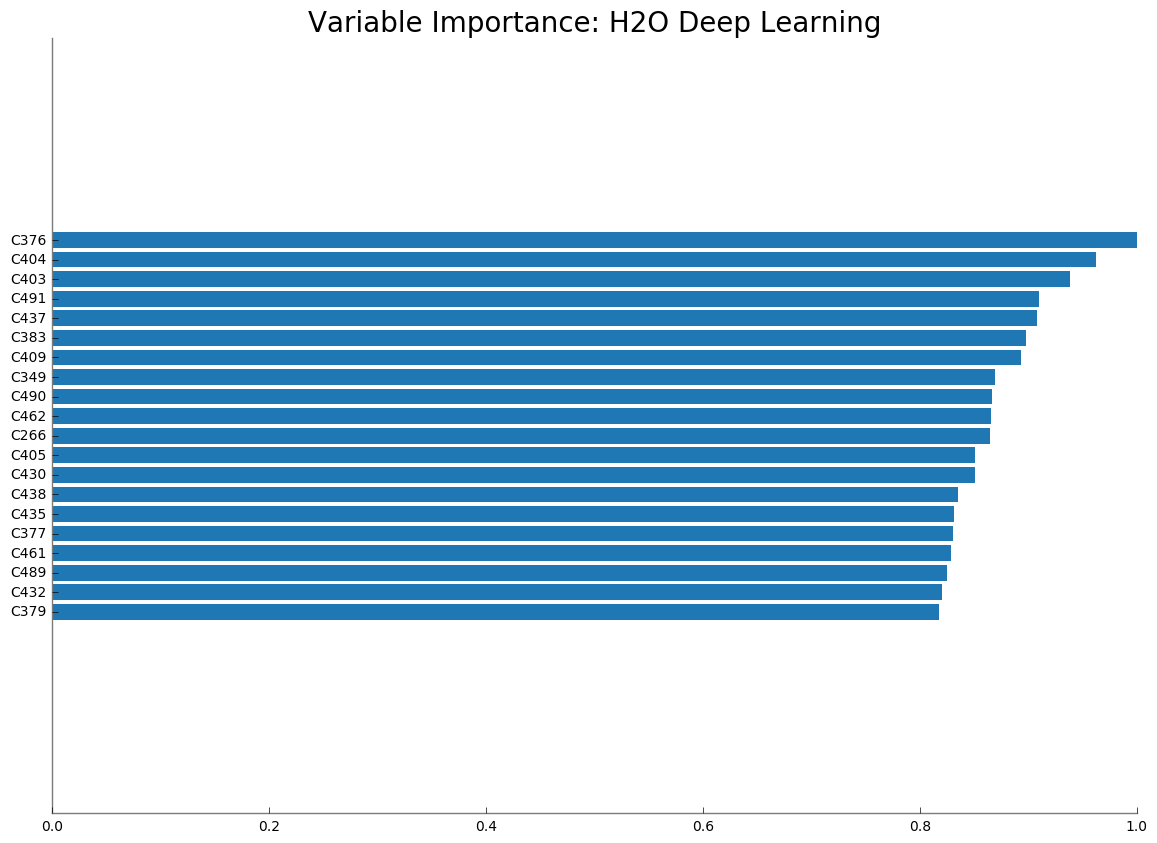

In [53]:
model_variable_importances.varimp_plot(num_of_features=20)

## Model Comparison with Grid Search

Grid search provides more subtle insights into the model tuning and selection
process by inspecting and comparing our trained models after the grid search process is complete. 

To learn when and how to select different parameter
configurations in a grid search, refer to Parameters for parameter descriptions
and configurable values.

There are different strategies to explore the hyperparameter combinatorial space:

- Cartesian Search: test *every* single combination
- Random Search: sample combinations

## Cartesian Search
In this example, two different network topologies and two different learning rates are specified. This grid search model trains all 4 different models (all possible combinations of these parameters); other parameter combinations can
be specified for a larger space of models. Note that the models will most likely
converge before the default value of epochs, since early stopping is enabled.

In [27]:
from h2o.grid.grid_search import H2OGridSearch

In [33]:
hyper_parameters = {
    "hidden":[[200,200,200],[300,300]], 
    "learning_rate":[1e-3,5e-3],
}

model_grid = H2OGridSearch(H2ODeepWaterEstimator, hyper_params=hyper_parameters)

In [35]:
model_grid.train(
    x=x, 
    y=y,
    distribution="multinomial", 
    epochs=50,   ## might stop earlier since we enable early stopping below
    training_frame=train_df, 
    validation_frame=test_df,
    score_interval=2,                ## score no more than every 2 seconds
    score_duty_cycle=0.5,            ## score up to 50% of the time - to enable early stopping
    score_training_samples=1000,     ## use a subset of the training frame for faster scoring
    score_validation_samples=1000,   ## use a subset of the validation frame for faster scoring
    stopping_rounds=3,
    stopping_tolerance=0.05,
    stopping_metric="misclassification",
    sparse = True,
    mini_batch_size=256
)

deepwater Grid Build progress: |██████████████████████████████████████████████████████████████| 100%


In [36]:
# print model grid search results
model_grid

              hidden learning_rate  \
0         [300, 300]         0.005   
1         [300, 300]         0.001   
2    [200, 200, 200]         0.005   
3    [200, 200, 200]         0.001   

                                                           model_ids  \
0  Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_9_model_3   
1  Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_9_model_1   
2  Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_9_model_2   
3  Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_9_model_0   

              logloss  
0   2.540532413363614  
1   2.890133394916092  
2   3.094028654656067  
3  3.4866005573233423  


In [37]:
for model in model_grid:
    print model.model_id + " mean per class error: " + str(model.mean_per_class_error())

Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_9_model_3 mean per class error: 0.0213260170276
Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_9_model_1 mean per class error: 0.0755123461905
Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_9_model_2 mean per class error: 0.0326985036086
Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_9_model_0 mean per class error: 0.0855142847753


In [38]:
import pandas as pd

In [61]:
grid_results = pd.DataFrame([[m.model_id, m.mean_per_class_error(valid=True)] for m in model_grid])
grid_results

,0,1
0,Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_9_model_3,0.076350
1,Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_9_model_1,0.084042
2,Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_9_model_2,0.091444
3,Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_9_model_0,0.104300


## Random Grid Search

If the search space is too large you can let the GridSearch algorithm select the parameter, by sampling from the parameter space. 

Just specify how many models (and/or how much training time) you want, and provide a seed to make the random selection deterministic.

In [49]:
hyper_parameters = {
    "hidden":[[1000,1000],[2000]],
    "learning_rate":[s*1e-3 for s in range(30,100)],
    "momentum_start":[s*1e-3 for s in range(0,900)],
    "momentum_stable":[s*1e-3 for s in range(900,1000)],
}

In [50]:
search_criteria = {"strategy":"RandomDiscrete", "max_models":10, "max_runtime_secs":100, "seed":123456}

model_grid_random_search = H2OGridSearch(H2ODeepWaterEstimator,
    hyper_params=hyper_parameters,
    search_criteria=search_criteria)

In [56]:
model_grid_random_search.train(
    x=x, y=y,
    distribution="multinomial", 
    epochs=50,   ## might stop earlier since we enable early stopping below
    training_frame=train_df, 
    validation_frame=test_df,
    score_interval=2,                ## score no more than every 2 seconds
    score_duty_cycle=0.5,            ## score up to 50% of the wall clock time - scoring is needed for early stopping
    score_training_samples=1000,     ## use a subset of the training frame for faster scoring
    score_validation_samples=1000,   ## use a subset of the validation frame for faster scoring
    stopping_rounds=3,
    stopping_tolerance=0.05,
    stopping_metric="misclassification",
    sparse = True,
    mini_batch_size=256)

deepwater Grid Build progress: |██████████████████████████████████████████████████████████████| 100%


In [59]:
grid_results = pd.DataFrame([[m.model_id, m.mean_per_class_error(valid=True)] for m in model_grid_random_search])

In [60]:
grid_results

,0,1
0,Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_11_model_0,0.019816
1,Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_11_model_2,0.022739
2,Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_11_model_3,0.041271
3,Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_11_model_4,0.066077
4,Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_11_model_5,0.162954
5,Grid_DeepWater_py_2_sid_b972_model_python_1477177984287_11_model_1,0.199744


## Model Checkpoints 



H2O supporst model checkpoints. You can store the `state` of training and resume it later.
Checkpointing can be used to reload existing models that were saved to
disk in a previous session. 

To resume model training, use checkpoint model keys (model id) to incrementally
train a specific model using more iterations, more data, different data, and
so forth. To further train the initial model, use it (or its key) as a checkpoint
argument for a new model.

To improve this initial model, start from the previous model and add iterations by
building another model, specifying checkpoint=previous model id, and
changing train samples per iteration, target ratio comm to comp,
or other parameters. Many parameters can be changed between checkpoints,
especially those that affect regularization or performance tuning.

You can use GridSearch with checkpoint restarts to scan a broader range of hyperparameter combinations.

In [81]:
# Re-start the training process on a saved DL model using the ‘checkpoint‘ argument
model_checkpoint = H2ODeepWaterEstimator(
     checkpoint=model.model_id,
     distribution="multinomial",
     activation="rectifier",
     mini_batch_size=128,
     hidden=[1024,1024],
     hidden_dropout_ratios=[0.5,0.5],
     input_dropout_ratio=0.1,
     sparse=True,
     epochs=20)  ## previous model had 10 epochs, so we need to only train for 10 more to get to 20 epochs

In [82]:
model_checkpoint.train(
 x=x,
 y=y,
 training_frame=train_df,
 validation_frame=test_df)

deepwater Model Build progress: |█████████████████████████████████████████████████████████████| 100%


In [83]:
model_checkpoint.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2016-10-22 16:43:19,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2016-10-22 16:43:20,3.655 sec,7953 obs/sec,0.068267,1,4096.0,0.437065,6.595456,0.191026,0.442109,6.736326,0.1955
2,,2016-10-22 16:43:32,15.324 sec,24227 obs/sec,4.437333,65,266240.0,0.135399,0.629897,0.018333,0.214942,1.593245,0.0462
3,,2016-10-22 16:43:43,26.498 sec,27942 obs/sec,10.035200,147,602112.0,0.093329,0.294170,0.008711,0.211899,1.546729,0.0449
4,,2016-10-22 16:44:12,28.457 sec,27806 obs/sec,10.103467,148,606208.0,0.111641,0.423550,0.012454,0.220221,1.665133,0.0485
5,,2016-10-22 16:44:22,38.399 sec,27232 obs/sec,14.131200,207,847872.0,0.146356,0.729553,0.021421,0.195965,1.322237,0.0384
6,,2016-10-22 16:44:28,44.595 sec,27992 obs/sec,17.134933,251,1028096.0,0.111149,0.420023,0.012354,0.184538,1.162109,0.0341
7,,2016-10-22 16:44:35,50.744 sec,28198 obs/sec,19.865600,291,1191936.0,0.080474,0.222153,0.006476,0.173003,1.024147,0.0300
8,,2016-10-22 16:44:36,51.657 sec,28195 obs/sec,20.002133,293,1200128.0,0.080474,0.219504,0.006476,0.165528,0.941545,0.0274


Specify a model and a file path. The default path is the current working directory.

In [84]:
model_path = h2o.save_model(
     model = model,
     #path = "/tmp/mymodel",
     force = True)

print model_path

/home/arno/h2o-3/examples/deeplearning/notebooks/DeepWater_model_python_1477179782032_1


In [85]:
!ls -lah $model_path

-rw-rw-r-- 1 arno arno 7.0M Oct 22 16:45 /home/arno/h2o-3/examples/deeplearning/notebooks/DeepWater_model_python_1477179782032_1


After restarting H2O, you can load the saved model by specifying the host and model file path. 

Note: The saved model must be the same version used to save the model.

In [86]:
# Load model from disk
saved_model = h2o.load_model(model_path)

You can also use the following commands to retrieve a model from its H2O key.
This is useful if you have created an H2O model using the web interface and
want to continue the modeling process in another language, for example **R**.

In [87]:
# Retrieve model by H2O key
model = h2o.get_model(model_id=model_checkpoint._id)
model

Model Details
H2ODeepWaterEstimator :  Deep Water
Model Key:  DeepWater_model_python_1477179782032_3
Status of Deep Learning Model: MLP: [1024, 1024], 6.9 MB, predicting C785, 10-class classification, 1,200,128 training samples, mini-batch size 128



,input_neurons,rate,momentum
,717,0.0022726,0.99




ModelMetricsMultinomial: deepwater
** Reported on train data. **

MSE: 0.00647603750669
RMSE: 0.0804738311918
LogLoss: 0.21950361285
Mean Per-Class Error: 0.00655568304453
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
984.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0070636,7 / 991
0.0,1149.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0043328,"5 / 1,154"
0.0,0.0,1016.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0039216,"4 / 1,020"
0.0,2.0,3.0,1030.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0124640,"13 / 1,043"
0.0,0.0,0.0,0.0,967.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 967
0.0,0.0,0.0,3.0,0.0,890.0,0.0,2.0,5.0,4.0,0.0154867,14 / 904
0.0,0.0,0.0,0.0,0.0,1.0,965.0,0.0,0.0,0.0,0.0010352,1 / 966
0.0,1.0,0.0,0.0,0.0,0.0,0.0,1023.0,0.0,1.0,0.0019512,"2 / 1,025"
0.0,2.0,4.0,1.0,1.0,2.0,2.0,2.0,970.0,1.0,0.0152284,15 / 985
0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,978.0,0.0040733,4 / 982


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9935240
2,0.9948192
3,0.9948192
4,0.9948192
5,0.9948192
6,0.9948192
7,0.9948192
8,0.9948192
9,0.9948192
10,1.0



ModelMetricsMultinomial: deepwater
** Reported on validation data. **

MSE: 0.0273996641587
RMSE: 0.165528439124
LogLoss: 0.941545364671
Mean Per-Class Error: 0.0277742924787
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
963.0,1.0,3.0,1.0,1.0,2.0,3.0,0.0,3.0,3.0,0.0173469,17 / 980
0.0,1124.0,4.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0096916,"11 / 1,135"
7.0,2.0,996.0,6.0,1.0,0.0,2.0,9.0,8.0,1.0,0.0348837,"36 / 1,032"
0.0,1.0,8.0,979.0,0.0,9.0,0.0,6.0,3.0,4.0,0.0306931,"31 / 1,010"
0.0,1.0,5.0,0.0,951.0,1.0,2.0,7.0,1.0,14.0,0.0315682,31 / 982
2.0,1.0,1.0,10.0,0.0,856.0,6.0,2.0,8.0,6.0,0.0403587,36 / 892
4.0,3.0,4.0,0.0,3.0,5.0,936.0,0.0,3.0,0.0,0.0229645,22 / 958
1.0,3.0,8.0,0.0,2.0,0.0,0.0,1005.0,2.0,7.0,0.0223735,"23 / 1,028"
2.0,0.0,7.0,10.0,3.0,8.0,3.0,4.0,933.0,4.0,0.0420945,41 / 974
1.0,3.0,1.0,2.0,6.0,3.0,0.0,10.0,0.0,983.0,0.0257681,"26 / 1,009"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9726
2,0.9752
3,0.9753
4,0.9753
5,0.9753
6,0.9753
7,0.9753
8,0.9753
9,0.9753
10,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2016-10-22 16:43:19,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan
,2016-10-22 16:43:20,3.655 sec,7953 obs/sec,0.0682667,1,4096.0,0.4370652,6.5954557,0.1910260,0.4421092,6.7363260,0.1955
,2016-10-22 16:43:32,15.324 sec,24227 obs/sec,4.4373333,65,266240.0,0.1353988,0.6298973,0.0183328,0.2149419,1.5932451,0.0462
,2016-10-22 16:43:43,26.498 sec,27942 obs/sec,10.0352,147,602112.0,0.0933289,0.2941703,0.0087106,0.2118989,1.5467293,0.0449
,2016-10-22 16:44:12,28.457 sec,27806 obs/sec,10.1034667,148,606208.0,0.1116407,0.4235503,0.0124539,0.2202207,1.6651330,0.0485
,2016-10-22 16:44:22,38.399 sec,27232 obs/sec,14.1312,207,847872.0,0.1463561,0.7295526,0.0214207,0.1959646,1.3222373,0.0384
,2016-10-22 16:44:28,44.595 sec,27992 obs/sec,17.1349333,251,1028096.0,0.1111494,0.4200229,0.0123543,0.1845377,1.1621092,0.0341
,2016-10-22 16:44:35,50.744 sec,28198 obs/sec,19.8656,291,1191936.0,0.0804738,0.2221525,0.0064760,0.1730029,1.0241470,0.03
,2016-10-22 16:44:36,51.657 sec,28195 obs/sec,20.0021333,293,1200128.0,0.0804738,0.2195036,0.0064760,0.1655284,0.9415454,0.0274


## Conclusions

In this jupyter you learned to:
- use a deeplearning model
- use GridSearch
- use Checkpointing
- use Early Stopping